

"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


Loaded images shape: (1799, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


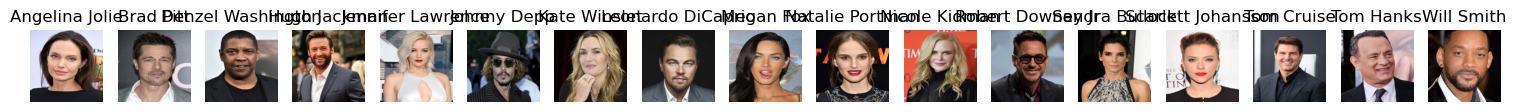

In [1]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = 'C:\\Users\\eklav\\Desktop\\Test 8.0\\Practical Question\\Celebrity Faces Dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Sample code for solving
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Function to create the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 20

# Load and preprocess the dataset (example)
# Replace with actual loading and preprocessing steps
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Example input shape (to be adjusted based on dataset)
input_shape = train_images.shape[1:]
num_classes = len(set(train_labels.flatten()))

# Create the model
model = create_model(input_shape, num_classes)
model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**You can utilize any code, including our existing code, to enhance your project.**

**All the best**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = dataset_directory

# Create an ImageDataGenerator object for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1440 images belonging to 17 classes.
Found 359 images belonging to 17 classes.


In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.0899 - loss: 4.2808 - val_accuracy: 0.1114 - val_loss: 2.8277
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1142 - loss: 2.8091 - val_accuracy: 0.1142 - val_loss: 2.7527
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1207 - loss: 2.7109 - val_accuracy: 0.2033 - val_loss: 2.5940
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1693 - loss: 2.5538 - val_accuracy: 0.2033 - val_loss: 2.3935
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1996 - loss: 2.3871 - val_accuracy: 0.2674 - val_loss: 2.2437
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3165 - loss: 2.1745 - val_accuracy: 0.3092 - val_loss: 2.1250
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4084 - loss: 1.8458 - val_accuracy: 0.2981 - val_loss: 2.1087
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5680 - loss: 1.4478 - val_accuracy: 0.3538 - val_loss:

In [7]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.3537 - loss: 2.5222
Validation Accuracy: 0.3259


In [8]:
# Predict the classes for the validation set
validation_generator.reset()
y_pred = model.predict(validation_generator)

# Get the predicted classes without using np.argmax or np.apply_along_axis
y_pred_classes = [np.argmax(pred) for pred in y_pred]

# Get the true classes
y_true = validation_generator.classes

# Compute classification metrics
report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
print(report)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step
                    precision    recall  f1-score   support

    Angelina Jolie       0.07      0.10      0.08        20
         Brad Pitt       0.00      0.00      0.00        20
 Denzel Washington       0.00      0.00      0.00        20
      Hugh Jackman       0.08      0.10      0.09        20
 Jennifer Lawrence       0.00      0.00      0.00        19
       Johnny Depp       0.00      0.00      0.00        20
      Kate Winslet       0.10      0.05      0.07        20
 Leonardo DiCaprio       0.11      0.05      0.07        20
         Megan Fox       0.00      0.00      0.00        20
   Natalie Portman       0.09      0.05      0.06        20
     Nicole Kidman       0.18      0.10      0.13        20
  Robert Downey Jr       0.00      0.00      0.00        20
    Sandra Bullock       0.00      0.00      0.00        20
Scarlett Johansson       0.11      0.23      0.15        40
        Tom Cruise       0.12      0.10      0.11        2

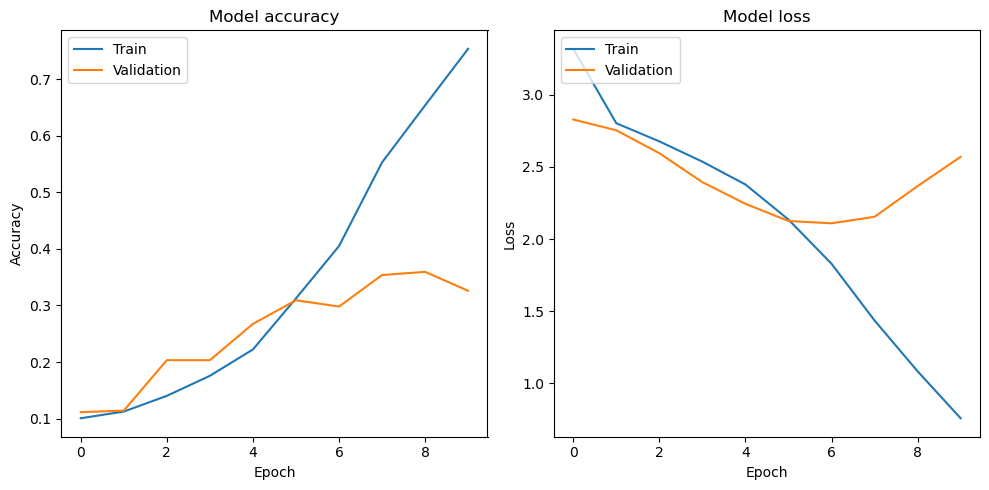

In [9]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Object Detection Question - Answers

# Q1 -  What is Mean Average Precision (mAP) in the context of object detection, and how is it calculated?

# Answer -------

Mean Average Precision (mAP) in object detection measures how well a model detects objects across different categories. Here's a simple breakdown:

Precision and Recall: For each detected object, calculate precision (correct detections out of all detections) and recall (correct detections out of all actual objects).

Precision-Recall Curve: Plot precision against recall for different confidence thresholds.

Average Precision (AP): Calculate the area under the precision-recall curve for each category.

Mean Average Precision (mAP): Compute the average of APs across all categories.

So, mAP is the average of how well the model detects objects across all categories.

# Q2---- Explain the main differences between RCNN, Fast RCNN, and Faster RCNN.

# Answer--------

RCNN
Region Proposals: Uses selective search to find possible objects.
Feature Extraction: Processes each region separately with a CNN.
Speed: Slow because it analyzes each region independently.

Fast RCNN
Single Pass: Processes the whole image once with a CNN.
RoI Pooling: Extracts features for each region from a shared feature map.
Speed: Faster than RCNN due to shared computation.

Faster RCNN
Region Proposal Network (RPN): Generates region proposals using the same CNN.
Unified Architecture: Combines region proposal and object detection in one network.
Speed: Fastest due to integrated region proposal generation.
In summary:

RCNN: Slow, processes regions separately.

Fast RCNN: Faster, processes regions together.

Faster RCNN: Fastest, uses an integrated approach.


# Q3------ Describe the architecture and working principle of the YOLO (You Only Look Once) object detection algorithm.

# Answers ------------

YOLO (You Only Look Once)

Architecture:

Single CNN: Uses one convolutional neural network (CNN) to process the entire image.
    
Grid Division: Divides the image into a grid of cells.
    
Working Principle:

Prediction per Cell: Each grid cell predicts:
Bounding boxes (with confidence scores).

Class probabilities for objects.

Single Pass: Processes the entire image in one go, making it very fast.
    
Bounding Box Refinement: Refines the predicted boxes to fit objects better.
    
In short, YOLO is fast because it processes the image once, dividing it into a grid and making predictions for multiple objects in one pass.



# Q4 --------What is the Intersection over Union (IoU) metric, and why is it important in object detection?

# Answer ----------

Intersection over Union (IoU):

Definition: IoU measures the overlap between the predicted bounding box and the ground truth bounding box.
    
Calculation: Divide the area of overlap by the area of union between the two boxes.
    
Importance in Object Detection:

Accuracy: IoU helps determine how accurately the model predicts the location of objects.
    
Evaluation: Higher IoU indicates better detection performance, making it crucial for evaluating object detection models.

In short, IoU is a key metric for checking how well the predicted boxes match the actual objects.


# Q5 -----Explain the concept of non-maximum suppression (NMS) and its significance in object detection pipelines.

# Answer-------


Non-Maximum Suppression (NMS):

Concept: NMS selects the best bounding box when multiple boxes predict the same object.
    
Process:
Sort: Rank all predicted boxes by their confidence scores.
    
Select: Choose the box with the highest score.
    
Suppress: Remove overlapping boxes that have a high IoU with the selected box.
    
Repeat: Continue with the next highest score.
    
Significance in Object Detection:

Accuracy: Reduces duplicate detections by keeping only the most confident predictions.
    
Efficiency: Improves the clarity and reliability of the detection results.
    
In short, NMS ensures that each object is detected only once by keeping the best prediction and discarding redundant ones.


# Q6 --What are the key improvements introduced in YOLOv2 (YOLO9000) compared to the original YOLO algorithm?

# Answer -------

YOLOv2 (YOLO9000) Key Improvements:
    
Anchor Boxes: Uses predefined boxes to better predict object locations and shapes.
    
Batch Normalization: Normalizes inputs in each layer to improve training stability and performance.
    
Higher Resolution Classifier: Trains on higher resolution images for more accurate detections.
    
Dimension Clusters: Uses k-means clustering to optimize anchor box dimensions instead of using 2 bounding or anchor boxes.
    
Multi-Scale Training: Trains the model on images of different sizes to improve robustness.
    
Darknet-19: Introduces a more powerful and efficient network architecture for feature extraction in place of googlenet.
    
In short, YOLOv2 is more accurate and faster by using anchor boxes, improved training techniques, and a better network architecture.